In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
df=pd.read_csv('puanfilm.csv')
import warnings
warnings.filterwarnings ("ignore")

from sklearn.metrics import confusion_matrix
#

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
df.head()

,moviename,imdb,beyazperde,rottenttomatoes,value
0,Measure of a Man,6.3,3.1,52,0
1,Dude,5.1,3.0,35,0
2,Meg: Derinlerdeki Dehşet,5.6,3.5,49,1
3,Johnny English Tekrar İş Başında,6.2,2.5,37,0
4,Borç Harç,1.4,2.1,10,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
imdb,271.0,5.911070,1.341208,1.4,5.2,6.0,6.7,9.6
beyazperde,271.0,3.115129,0.677654,1.5,2.6,3.0,3.5,4.8
rottenttomatoes,271.0,61.605166,20.499752,10.0,46.5,62.0,76.5,100.0
value,271.0,0.313653,0.464836,0.0,0.0,0.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   moviename        271 non-null    object 
 1   imdb             271 non-null    float64
 2   beyazperde       271 non-null    float64
 3   rottenttomatoes  271 non-null    int64  
 4   value            271 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 10.7+ KB


In [6]:
df.eq(0).sum() #sıfır değerler sayılır

moviename            0
imdb                 0
beyazperde           0
rottenttomatoes      0
value              186
dtype: int64

In [7]:
df.shape

(271, 5)

In [8]:
df.head()

,moviename,imdb,beyazperde,rottenttomatoes,value
0,Measure of a Man,6.3,3.1,52,0
1,Dude,5.1,3.0,35,0
2,Meg: Derinlerdeki Dehşet,5.6,3.5,49,1
3,Johnny English Tekrar İş Başında,6.2,2.5,37,0
4,Borç Harç,1.4,2.1,10,1


In [9]:
df.isnull().sum()

moviename          0
imdb               0
beyazperde         0
rottenttomatoes    0
value              0
dtype: int64

In [10]:
df.corr()

,imdb,beyazperde,rottenttomatoes,value
imdb,1.000000,0.691839,0.737453,-0.418471
beyazperde,0.691839,1.000000,0.615399,-0.247926
rottenttomatoes,0.737453,0.615399,1.000000,-0.234931
value,-0.418471,-0.247926,-0.234931,1.000000


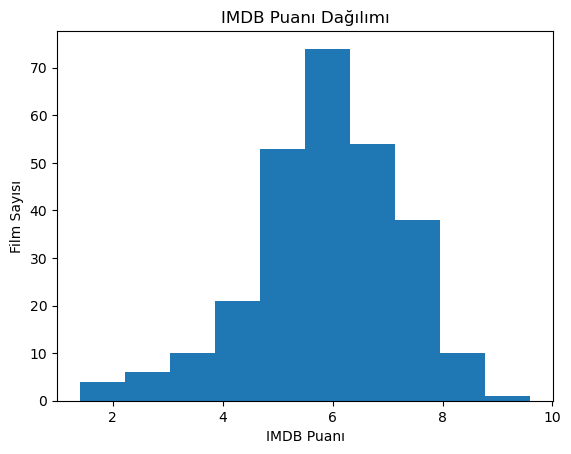

In [11]:
plt.hist(df['imdb'], bins=10)
plt.xlabel('IMDB Puanı')
plt.ylabel('Film Sayısı')
plt.title('IMDB Puanı Dağılımı')
plt.show()

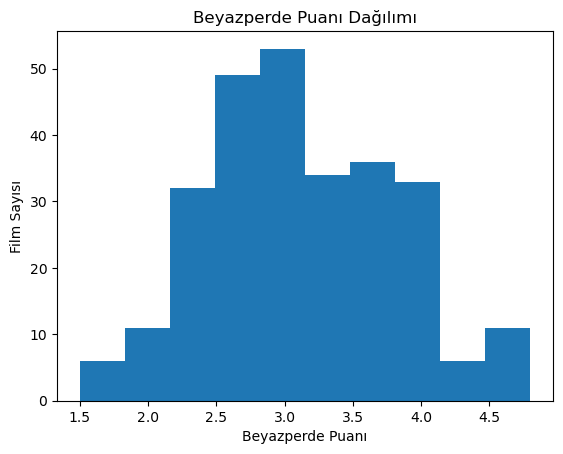

In [12]:
plt.hist(df['beyazperde'], bins=10)
plt.xlabel('Beyazperde Puanı')
plt.ylabel('Film Sayısı')
plt.title('Beyazperde Puanı Dağılımı')
plt.show()

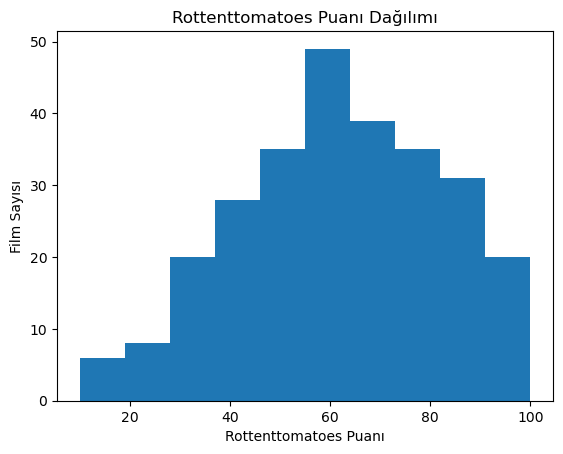

In [13]:
plt.hist(df['rottenttomatoes'], bins=10)
plt.xlabel('Rottenttomatoes Puanı')
plt.ylabel('Film Sayısı')
plt.title('Rottenttomatoes Puanı Dağılımı')
plt.show()

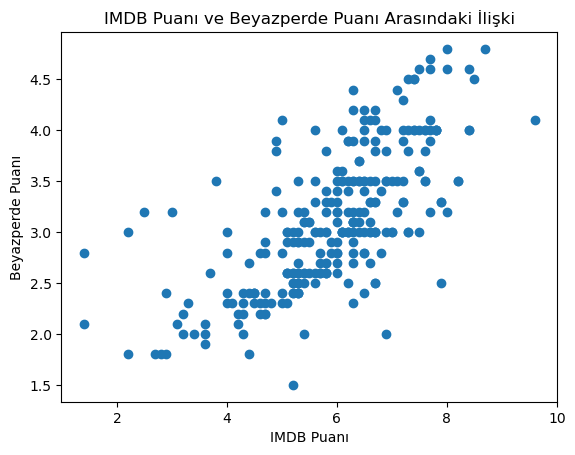

In [14]:
plt.scatter(df['imdb'], df['beyazperde'])
plt.xlabel('IMDB Puanı')
plt.ylabel('Beyazperde Puanı')
plt.title('IMDB Puanı ve Beyazperde Puanı Arasındaki İlişki')
plt.show()

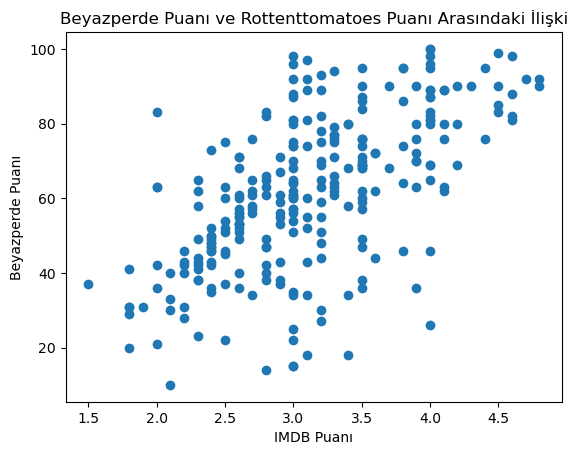

In [15]:
plt.scatter(df['beyazperde'], df['rottenttomatoes'])
plt.xlabel('IMDB Puanı')
plt.ylabel('Beyazperde Puanı')
plt.title('Beyazperde Puanı ve Rottenttomatoes Puanı Arasındaki İlişki')
plt.show()

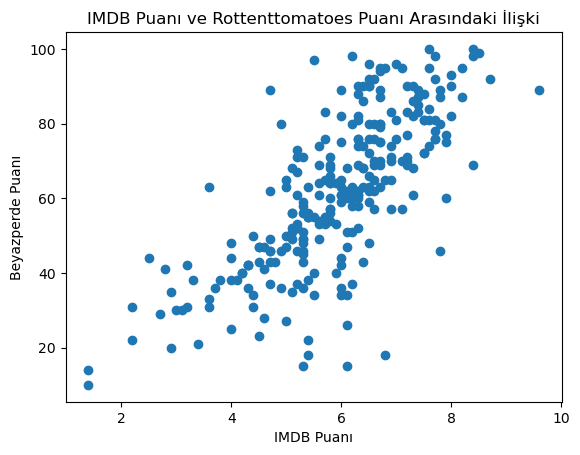

In [16]:
plt.scatter(df['imdb'], df['rottenttomatoes'])
plt.xlabel('IMDB Puanı')
plt.ylabel('Beyazperde Puanı')
plt.title('IMDB Puanı ve Rottenttomatoes Puanı Arasındaki İlişki')
plt.show()

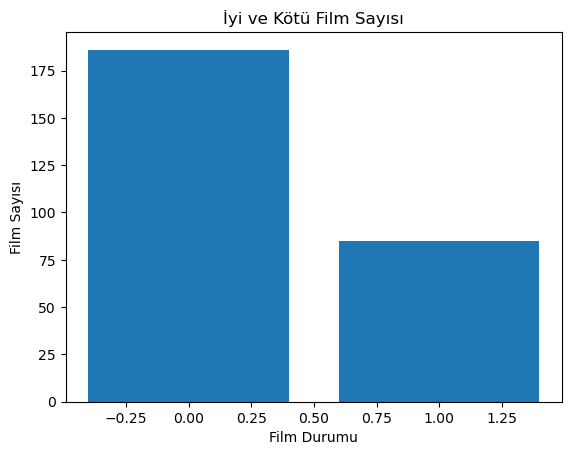

In [17]:
film_counts = df['value'].value_counts()
film_labels = film_counts.index

plt.bar(film_labels, film_counts)
plt.xlabel('Film Durumu')
plt.ylabel('Film Sayısı')
plt.title('İyi ve Kötü Film Sayısı')
plt.show()

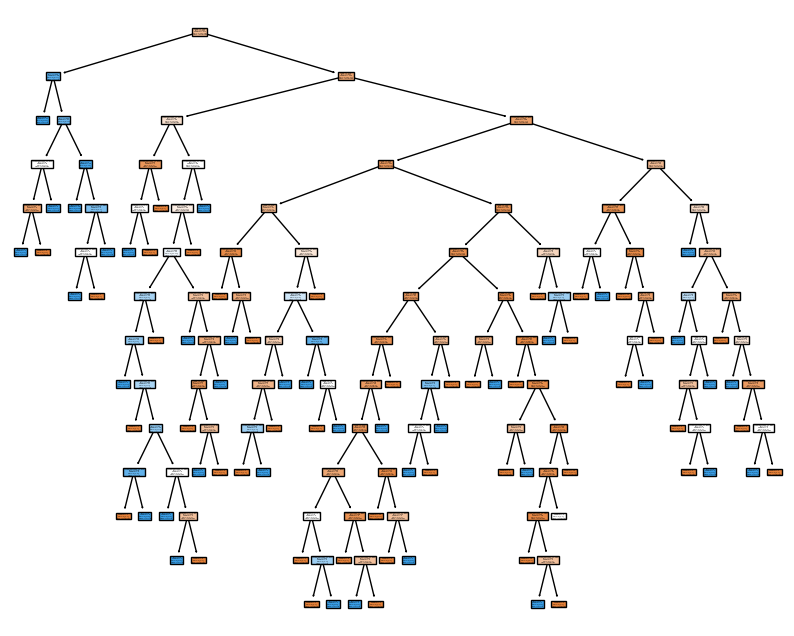

In [18]:
# Bağımsız değişkenler (sütunlar)
X = df.drop(["moviename", "value"], axis=1)

# Bağımlı değişken (hedef)
y = df["value"]

# Karar ağacı sınıflandırıcı modelini oluşturma
model = DecisionTreeClassifier()

# Modeli eğitme
model.fit(X, y)

# Karar ağacı grafiğini çizme
fig = plt.figure(figsize=(10, 8))
_ = tree.plot_tree(model, feature_names=X.columns, class_names=["Kötü Film", "İyi Film"], filled=True)
plt.show()

<AxesSubplot:>

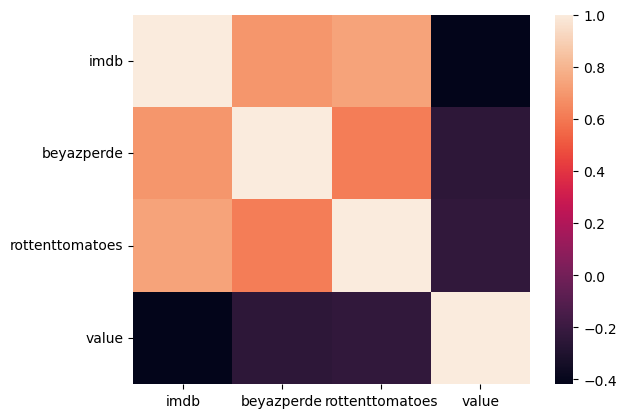

In [19]:
sns.heatmap(df.corr())

In [20]:
df.corr().nlargest(3,'value').index.tolist()

['value', 'rottenttomatoes', 'beyazperde']

In [21]:
# Modelleri tanımlama
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVR", SVC()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("RandomForest", RandomForestClassifier()))
models.append(("AdaBoost", AdaBoostClassifier()))


# Bağımsız değişkenler (sütunlar)
X = df.drop(["value", "moviename"], axis=1)

# Bağımlı değişken (hedef)
y = df["value"]

# Veri kümesini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

# Her bir model için doğruluk skorunu ve çapraz doğrulama skorunu hesaplama
for name, model in models:
    mod = model.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cvscore = cross_val_score(model, X, y, cv=10).mean()
    print("Holdout method:", name, acc)
    print("Cross Val Score:", name, cvscore)
    print("----------------------------------------")
    
    
    


Holdout method: LR 0.7636363636363637
Cross Val Score: LR 0.7712962962962963
----------------------------------------
Holdout method: KNN 0.6181818181818182
Cross Val Score: KNN 0.675
----------------------------------------
Holdout method: SVR 0.6363636363636364
Cross Val Score: SVR 0.6788359788359789
----------------------------------------
Holdout method: CART 0.6363636363636364
Cross Val Score: CART 0.7013227513227512
----------------------------------------
Holdout method: RandomForest 0.7272727272727273
Cross Val Score: RandomForest 0.7862433862433862
----------------------------------------
Holdout method: AdaBoost 0.6727272727272727
Cross Val Score: AdaBoost 0.7453703703703705
----------------------------------------


In [22]:
# Sonuçları saklamak için bir liste oluşturma
results = []

# Her bir model için doğruluk skorunu ve çapraz doğrulama skorunu hesaplama
for name, model in models:
    mod = model.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cvscore = cross_val_score(model, X, y, cv=10).mean()
    
    # Sonuçları listeye ekleme
    results.append([name, acc, cvscore])

# Sonuçları tablo şeklinde gösterme
print(tabulate(results, headers=["Model", "Accuracy", "Cross Val Score"], tablefmt="fancy_grid"))

╒══════════════╤════════════╤═══════════════════╕
│ Model        │   Accuracy │   Cross Val Score │
╞══════════════╪════════════╪═══════════════════╡
│ LR           │   0.763636 │          0.771296 │
├──────────────┼────────────┼───────────────────┤
│ KNN          │   0.618182 │          0.675    │
├──────────────┼────────────┼───────────────────┤
│ SVR          │   0.636364 │          0.678836 │
├──────────────┼────────────┼───────────────────┤
│ CART         │   0.672727 │          0.686508 │
├──────────────┼────────────┼───────────────────┤
│ RandomForest │   0.745455 │          0.764153 │
├──────────────┼────────────┼───────────────────┤
│ AdaBoost     │   0.672727 │          0.74537  │
╘══════════════╧════════════╧═══════════════════╛


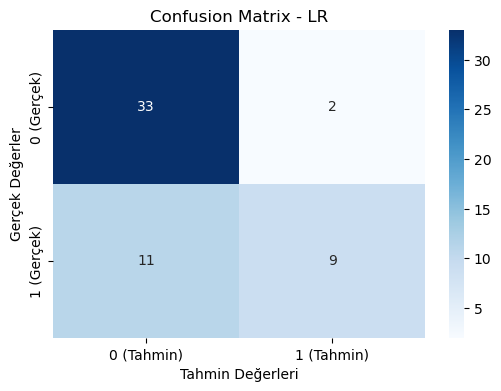

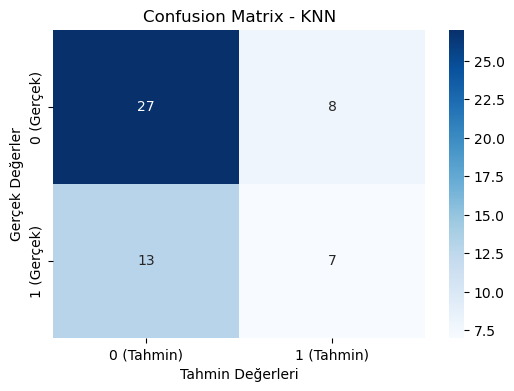

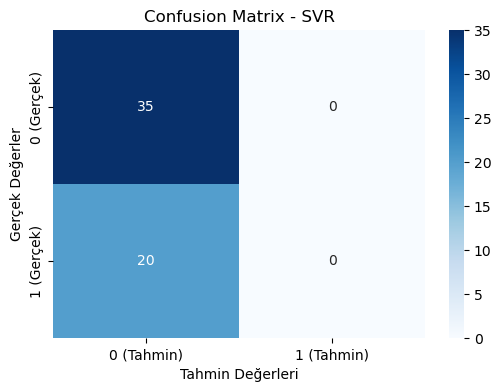

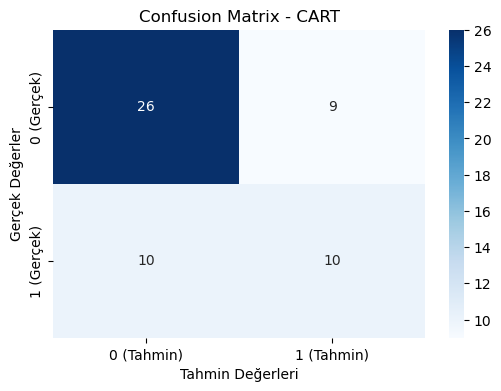

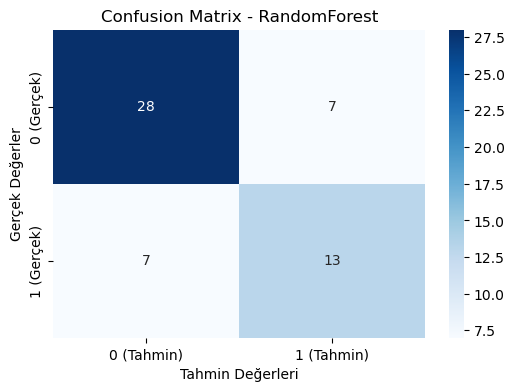

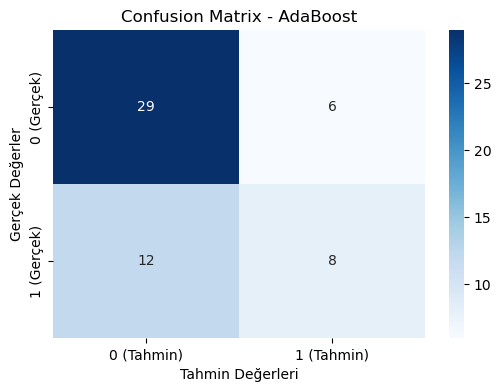

In [27]:
for name, model in models:
    mod = model.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Karmaşıklık matrisini DataFrame olarak dönüştürme
    cm_df = pd.DataFrame(cm, index=['0 (Gerçek)', '1 (Gerçek)'], columns=['0 (Tahmin)', '1 (Tahmin)'])
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - ' + name)
    plt.xlabel('Tahmin Değerleri')
    plt.ylabel('Gerçek Değerler')
    plt.show()

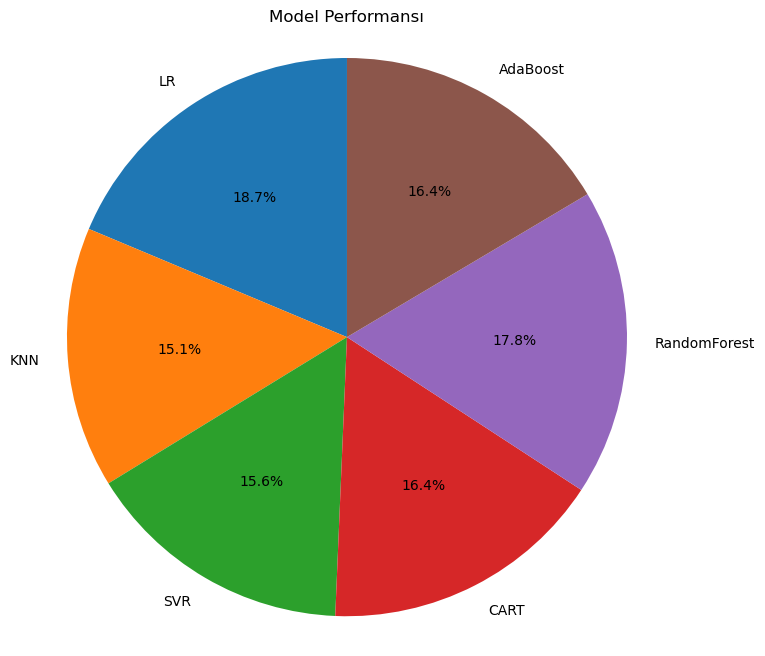

In [32]:
# Model isimleri
model_names = [name for name, _ in models]

# Pasta dilimi grafiği için verilerin hazırlanması
cm_values = []
for name, model in models:
    mod = model.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_values.append(cm[0][0] + cm[1][1])  # Doğru tahminlerin toplamını al

# Pasta dilimi grafiği oluşturma
plt.figure(figsize=(8, 8))
plt.pie(cm_values, labels=model_names, autopct='%1.1f%%', startangle=90)
plt.title('Model Performansı')
plt.axis('equal')

plt.show()